In [115]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, OneHotEncoder
from statsmodels.sandbox.tsa.try_arma_more import n_startup
from sklearn.decomposition import PCA

pd.options.display.float_format = '{:20,.2f}'.format
# display all columns by default 
pd.set_option('display.max_columns', 999)

# Data Exploration

In [116]:
# Load the data
df = pd.read_csv('data/customer_segmentation.csv') 
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,"62,513.00",0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,"55,635.00",0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,"33,454.00",1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,"30,351.00",1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,"5,648.00",1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [118]:
#describing our numerical data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,"2,240.00","2,240.00","2,216.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"5,592.16","1,968.81","52,247.25",0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,"3,246.66",11.98,"25,173.08",0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,"1,893.00","1,730.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,"2,828.25","1,959.00","35,303.00",0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,"5,458.50","1,970.00","51,381.50",0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,"8,427.75","1,977.00","68,522.00",1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,"11,191.00","1,996.00","666,666.00",2.00,2.00,99.00,"1,493.00",199.00,"1,725.00",259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


Everything here looks fine, aside from some entries missing incomes.

In [119]:
#describing our categorical data
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [120]:
df[df["Income"].isnull()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


Although we can still infer which customer made a purchase without the income data, income is likely a significant factor in determining how much a customer spends. We will drop these rows.

In [121]:
#Handling missing values 
imputer = SimpleImputer(strategy='median')
df['Income'] = imputer.fit_transform(df[['Income']])

In [122]:
#checking for any duplicate entries
df.duplicated().sum()

0

In [123]:
#checking for any missing values now that we have removed the missing income entries
df.isnull().sum()   

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

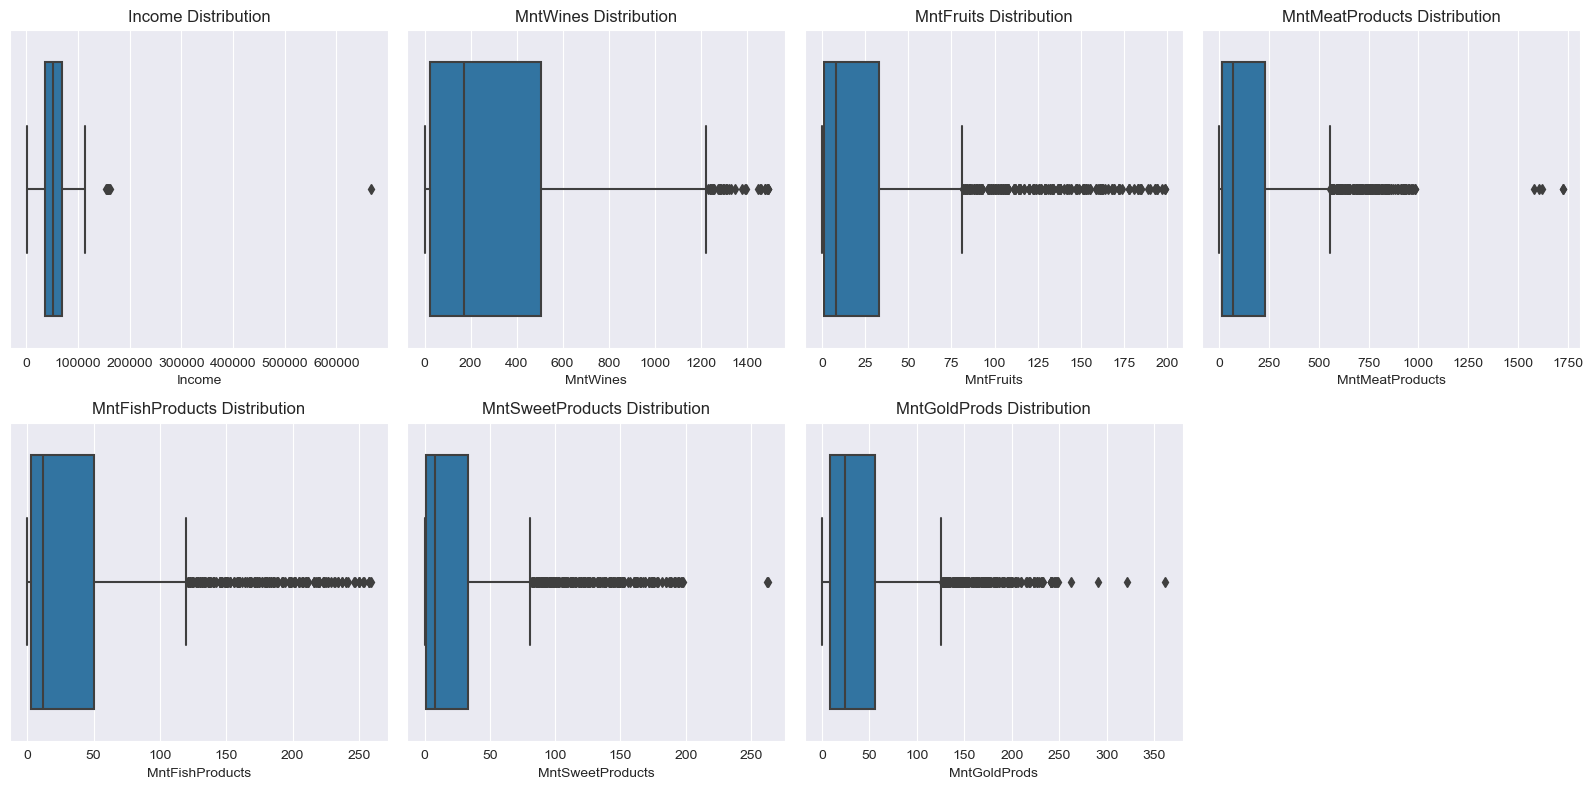

In [124]:
# Identifying and handling outliers 
numerical_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(16, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

In [125]:
# removing extreme outliers 
for feature in numerical_features:
    upper_limit = df[feature].quantile(0.99)
    lower_limit = df[feature].quantile(0.01)
    df = df[(df[feature] <= upper_limit) & (df[feature] >= lower_limit)]

# Data Visualization

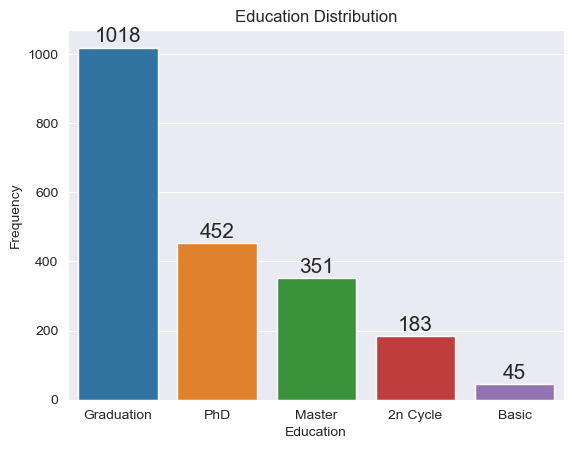

In [126]:
# displaying the education distribution
axes = sns.countplot(data=df, x='Education')
# displaying the frequency of each category
for bar in axes.patches:
    axes.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Education Distribution')
plt.ylabel('Frequency')
plt.show()

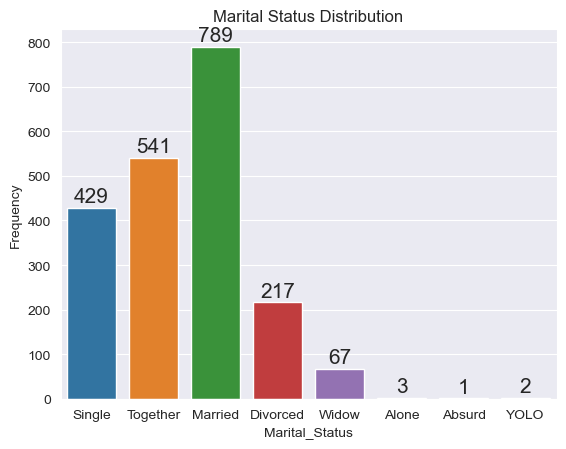

In [127]:
#displaying the marital status distribution
axes = sns.countplot(data=df, x='Marital_Status')
# displaying the frequency of each category
for bar in axes.patches:
    axes.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
        
plt.title('Marital Status Distribution')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Number of Children in Home by Marital Status')

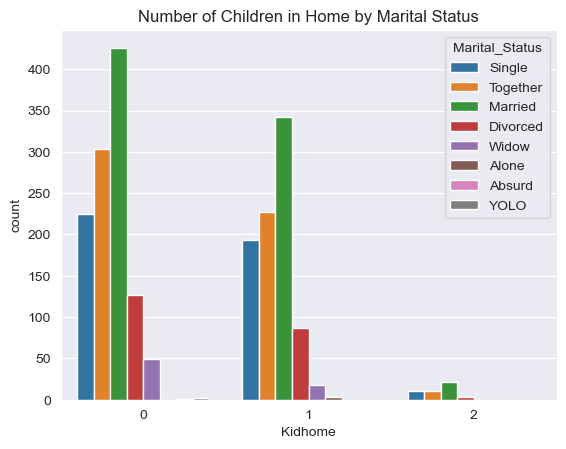

In [128]:
# displaying the number of children in the home based on martial status
sns.countplot(data=df, x='Kidhome', hue='Marital_Status')
plt.title('Number of Children in Home by Marital Status')

<Axes: xlabel='Teenhome', ylabel='count'>

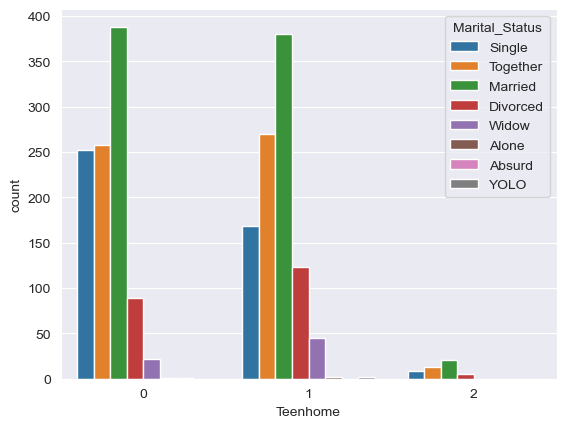

In [129]:
# and the same for the amount of teenagers in the home
sns.countplot(data=df, x='Teenhome', hue='Marital_Status')

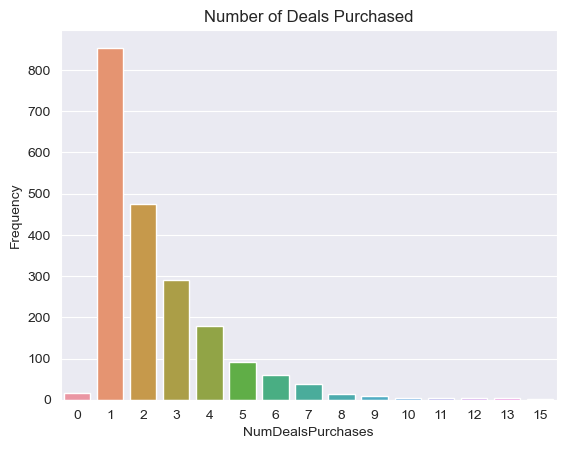

In [130]:
# displaying the number of purchases made by each customer
sns.countplot(data=df, x='NumDealsPurchases')
plt.title('Number of Deals Purchased')
plt.ylabel('Frequency')
plt.show()

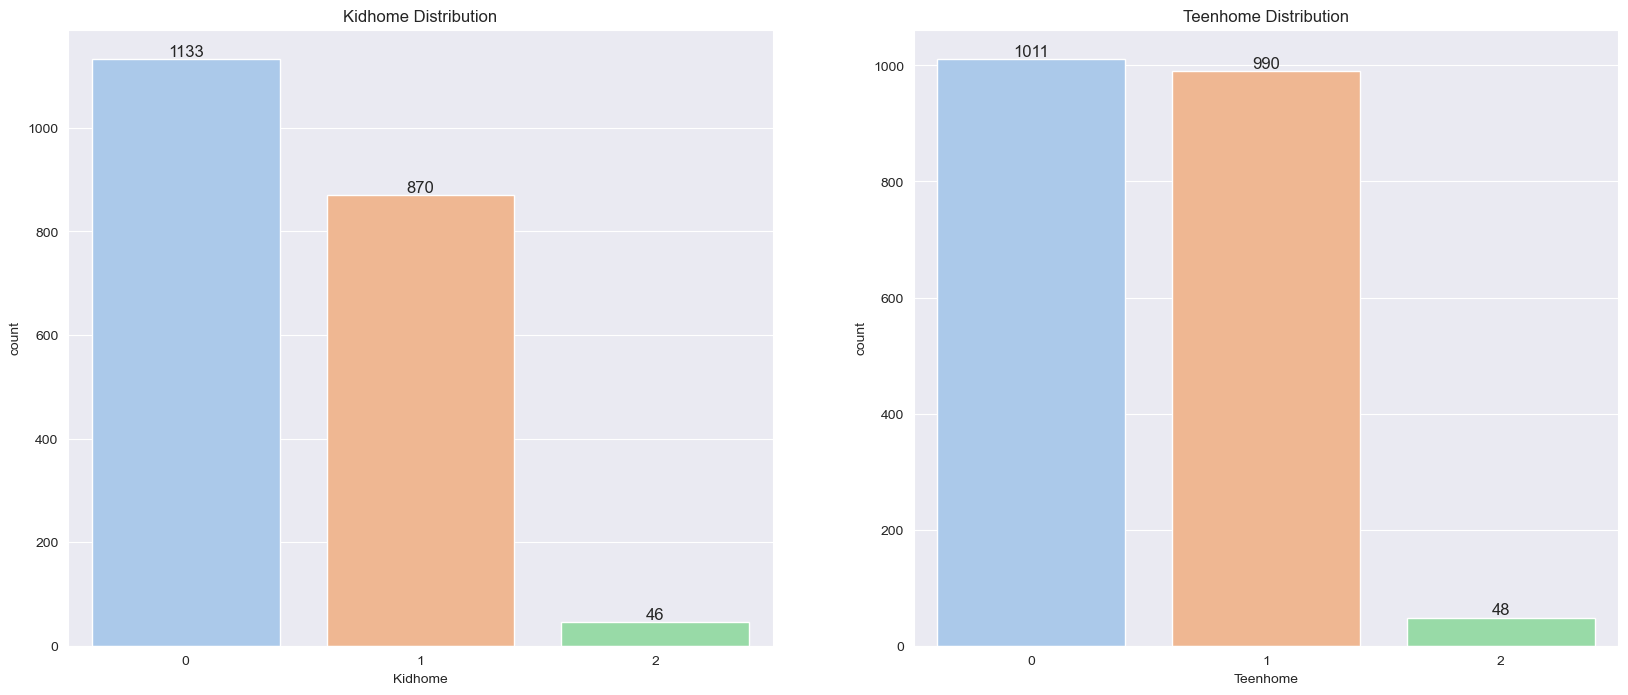

In [131]:
fig , Axes = plt.subplots(nrows=1 , ncols=2, figsize=(20,8))

#displaying the distribution of the number of children in the home
axes = sns.countplot(data= df, x='Kidhome', palette= 'pastel', ax= Axes[0])
Axes[0].set_title('Kidhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2. , y = height , s=int(height), ha='center', va='bottom',fontsize=12)



#displaying the distribution of the number of teenagers in the home
axes = sns.countplot(data=df, x='Teenhome', palette='pastel', ax= Axes[1])
Axes[1].set_title('Teenhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2, y = height, s= int(height), ha='center', va='bottom', fontsize=12)

plt.show()

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


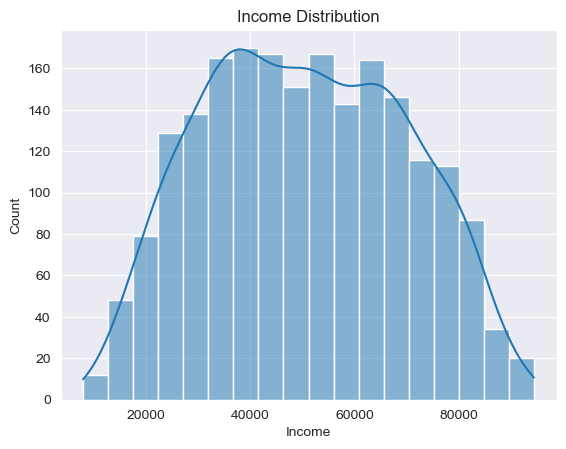

<Figure size 2000x1000 with 0 Axes>

In [132]:
# income distribution among customers
sns.histplot(data=df, x='Income', kde=True)
plt.title("Income Distribution")
plt.figure(figsize=(20, 10))
plt.show()

Text(0.5, 1.0, 'Income Distribution')

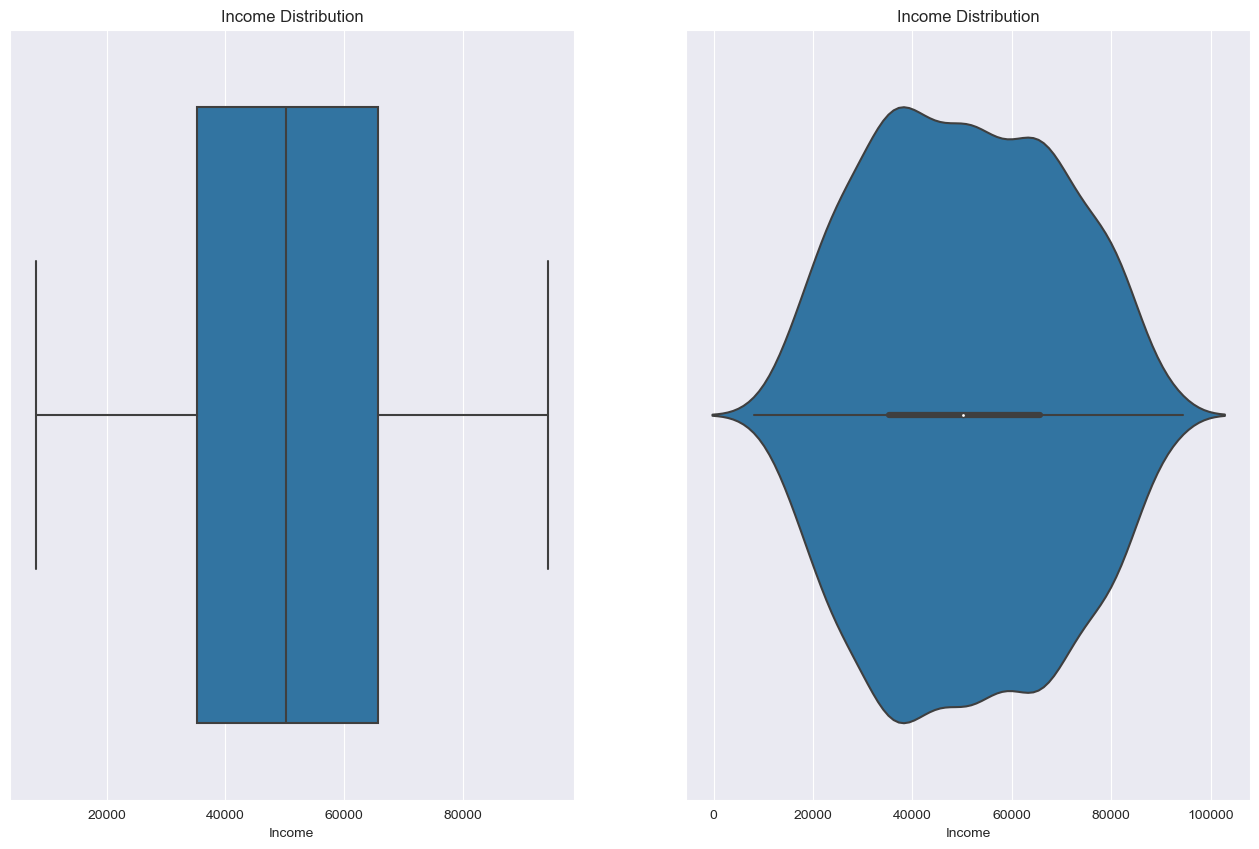

In [133]:
# visualzing the income distrbution to see outliers easier
plt.figure(figsize=(16, 10))    
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Income')
plt.title('Income Distribution')

plt.subplot(1,2,2)
sns.violinplot(data=df, x='Income')
plt.title('Income Distribution')    


## Feature Engineering


In [134]:
# we can use the year of birth to calculate the age of the customer
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# we can also make a column for the total number of purchases made by each customer
df['TotalPurchases'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df = df.drop('Dt_Customer', axis=1)
df.head(20)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalPurchases
0,5524,1957,Graduation,Single,"58,138.00",0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,Graduation,Single,"46,344.00",1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,27
2,4141,1965,Graduation,Together,"71,613.00",0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,776
3,6182,1984,Graduation,Together,"26,646.00",1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,53
4,5324,1981,PhD,Married,"58,293.00",1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,422
5,7446,1967,Master,Together,"62,513.00",0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,58,716
6,965,1971,Graduation,Divorced,"55,635.00",0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,54,590
7,6177,1985,PhD,Married,"33,454.00",1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,40,169
8,4855,1974,PhD,Together,"30,351.00",1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,51,46
10,1994,1983,Graduation,Married,"51,381.50",1,0,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,42,19


In [135]:
# we also need to encode the categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_features = ['Education', 'Marital_Status']
categorical_data = encoder.fit_transform(df[categorical_features])
encoded_columns = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(categorical_data, columns=encoded_columns, index=df.index)
encoded_columns = encoder.get_feature_names_out(['Education', 'Marital_Status'])
'''
Single = 4
Together = 5
Divorced = 2
Married = 3
'''

'''
Graduation = 2
PhD = 4
Master = 3
2n Cycle = 0 
Basic = 1
'''

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


'\nGraduation = 2\nPhD = 4\nMaster = 3\n2n Cycle = 0 \nBasic = 1\n'

In [136]:
encoded_df = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

cluster_df = encoded_df.groupby(encoded_df.columns, axis=1).first()
cluster_df = cluster_df.drop(columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'ID', 'Z_CostContact', 'Z_Revenue', 'Year_Birth'])

/var/folders/v7/43g09x6d23sb35sxhnq0gwm40000gn/T/ipykernel_17567/3596596172.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  cluster_df = encoded_df.groupby(encoded_df.columns, axis=1).first()


In [137]:
# Features need to be scaled before we can cluster them - so that each of them contributes equally to the distance calculations
features_to_scale = ['Income', 'Age', 'TotalPurchases', 'Recency', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
scaler = RobustScaler()
cluster_df[features_to_scale] = scaler.fit_transform(cluster_df[features_to_scale])
cluster_df.head()

,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Income,Kidhome,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,TotalPurchases
0,0.72,0.00,1.00,0.00,0.00,0.26,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,4.03,3.00,1.44,2.64,2.76,1.04,2.25,0.50,-0.20,1.25,7.00,0.16,1.00,0.00,1.43
1,0.89,0.00,1.00,0.00,0.00,-0.13,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-0.23,-0.22,-0.38,-0.29,-0.24,-0.33,0.00,0.00,-0.60,-0.50,5.00,-0.24,0.00,1.00,-0.34
2,0.28,0.00,1.00,0.00,0.00,0.70,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2.50,1.56,0.42,0.36,0.45,0.58,0.25,-0.50,1.00,1.25,4.00,-0.48,0.00,0.00,0.50
3,-0.78,0.00,1.00,0.00,0.00,-0.77,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.03,-0.11,-0.40,-0.22,-0.17,-0.33,-0.25,0.00,-0.20,-0.25,6.00,-0.48,0.00,0.00,-0.31
4,-0.61,0.00,0.00,0.00,1.00,0.27,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.88,1.33,-0.18,0.32,0.66,0.02,0.50,1.50,0.20,0.50,5.00,0.88,0.00,0.00,0.10


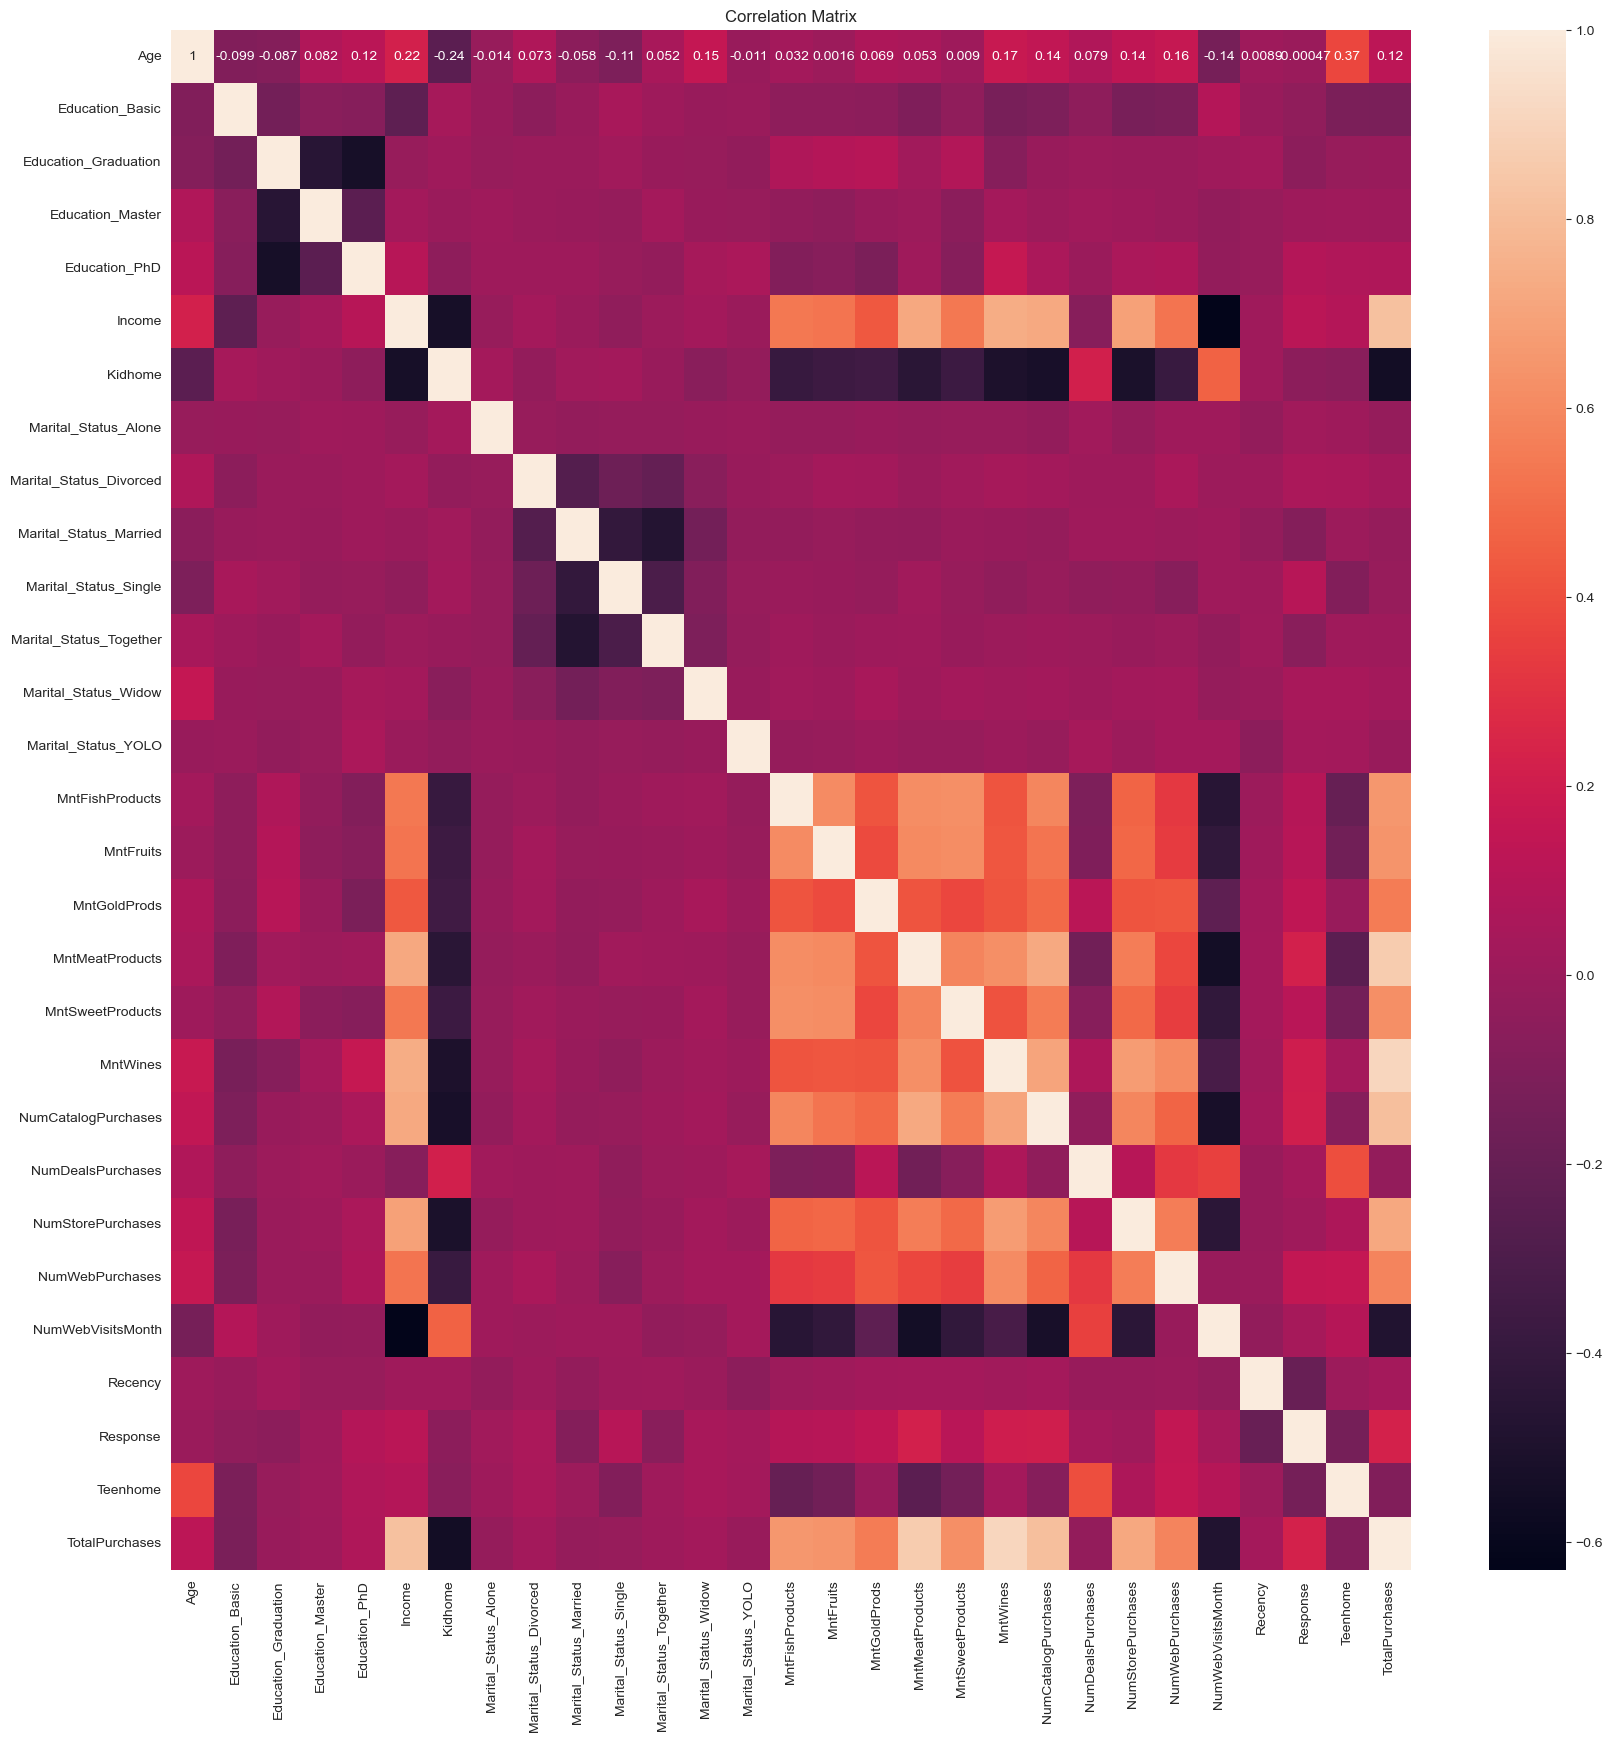

In [138]:
# now we can check the correlation between the features
plt.figure(figsize=(20, 20))
data_correlation = cluster_df.corr()
sns.heatmap(data_correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

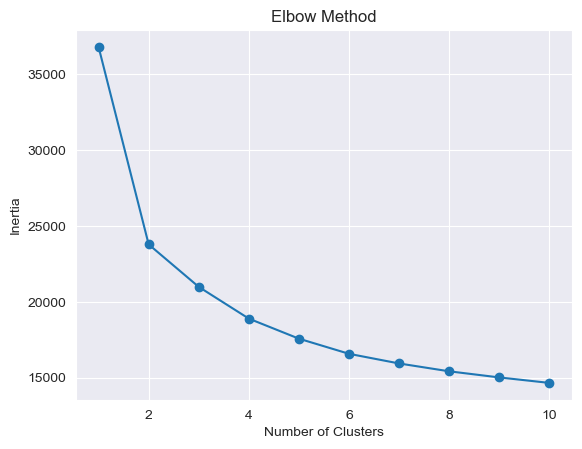

In [139]:
# KMeans clustering
k = range(1,11)
inertia = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(k, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


##### Based on the elbow method, lets choose 3 as the number of clusters

In [140]:
# dimensionality reduction
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(cluster_df)


/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

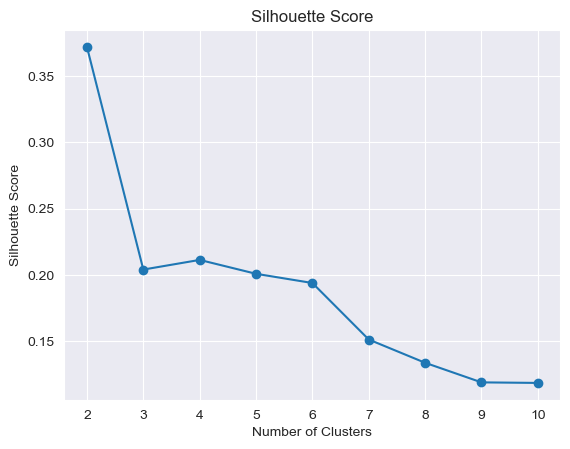

In [141]:
#Now lets evalute the clusters using the silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster_df)
    silhouette_scores.append(silhouette_score(pca_features, kmeans.labels_))
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [142]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
kmeans.fit(pca_features)

KMeans(n_clusters=3, n_init=1, random_state=42)

In [143]:
print(kmeans.inertia_)
silhouette_score(pca_features, kmeans.labels_)

19792.99454269918


0.23262553096455085

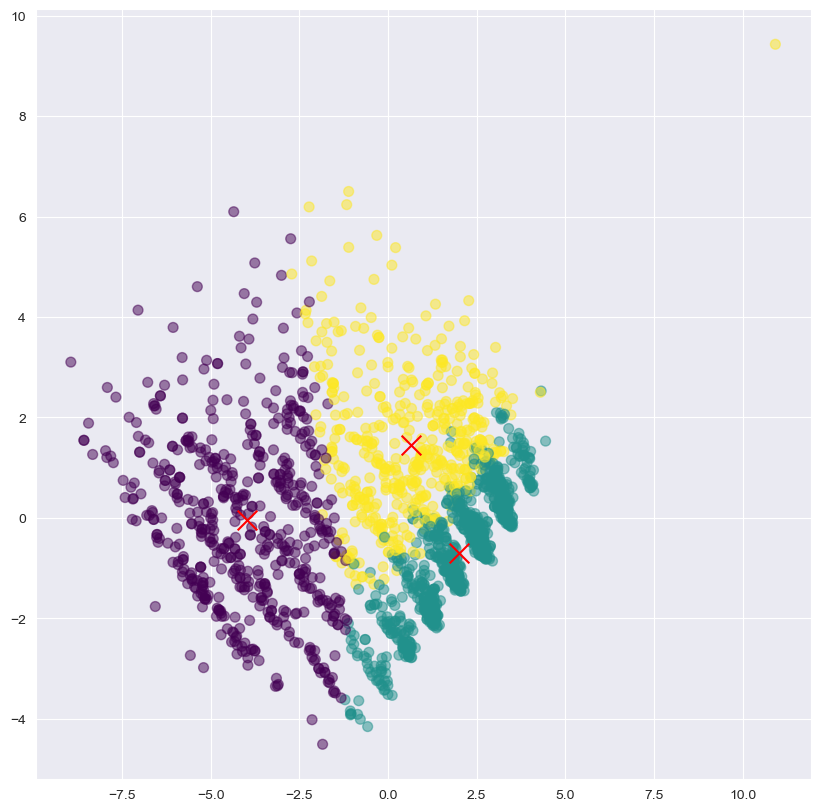

In [144]:
# Visualising the clusters
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 10))
plt.scatter(x = pca_features[:, 0], y = pca_features[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')



In [145]:
kmean_df = pd.DataFrame(data = cluster_df, columns = cluster_df.columns)
pred = kmeans.predict(pca_features)

kmean_df[features_to_scale] = scaler.inverse_transform(kmean_df[features_to_scale])
kmean_df['Cluster'] = pred + 1
kmean_df.head()

,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Income,Kidhome,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,TotalPurchases,Cluster
0,68.00,0.00,1.00,0.00,0.00,"58,138.00",0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,172.00,88.00,88.00,546.00,88.00,635.00,10.00,3.00,4.00,8.00,7.00,58.00,1.00,0.00,"1,617.00",1
1,71.00,0.00,1.00,0.00,0.00,"46,344.00",1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,1.00,6.00,6.00,1.00,11.00,1.00,2.00,2.00,1.00,5.00,38.00,0.00,1.00,27.00,2
2,60.00,0.00,1.00,0.00,0.00,"71,613.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,111.00,49.00,42.00,127.00,21.00,426.00,2.00,1.00,10.00,8.00,4.00,26.00,0.00,0.00,776.00,1
3,41.00,0.00,1.00,0.00,0.00,"26,646.00",1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,10.00,4.00,5.00,20.00,3.00,11.00,0.00,2.00,4.00,2.00,6.00,26.00,0.00,0.00,53.00,2
4,44.00,0.00,0.00,0.00,1.00,"58,293.00",1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,46.00,43.00,15.00,118.00,27.00,173.00,3.00,5.00,6.00,5.00,5.00,94.00,0.00,0.00,422.00,3


/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packag

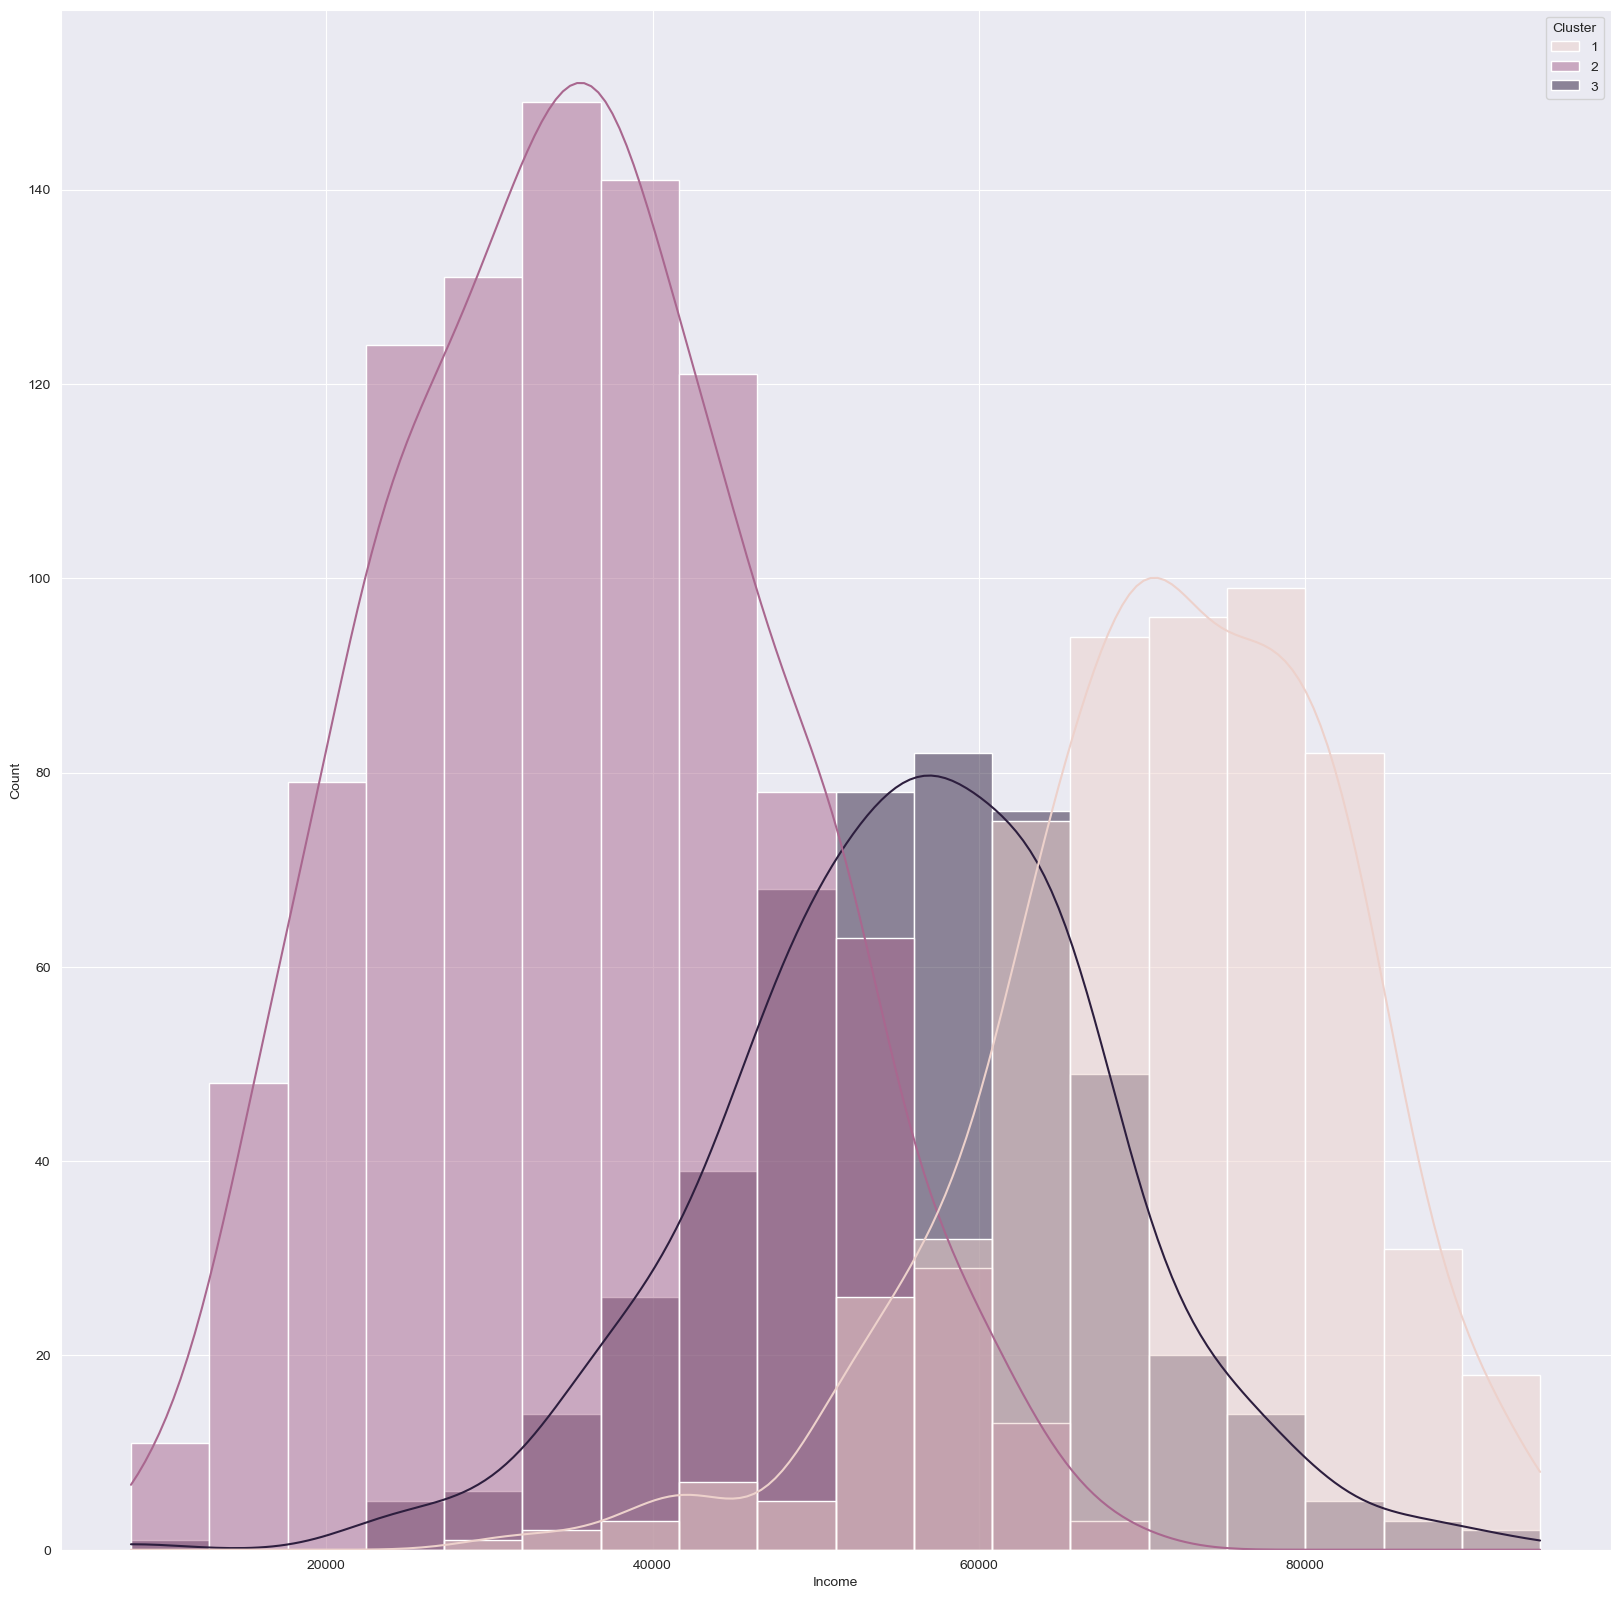

In [146]:
plt.figure(figsize=(20,20))
sns.histplot(data=kmean_df, x='Income', hue=kmean_df['Cluster'], kde=True)
plt.show()

In [147]:
# Analysing the properties of the different clusters to gain information about the different customer segments
kmean_df.groupby('Cluster')['Income'].mean()

Cluster
1              71,605.98
2              35,676.86
3              55,978.23
Name: Income, dtype: float64

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packag

<Axes: xlabel='TotalPurchases', ylabel='Count'>

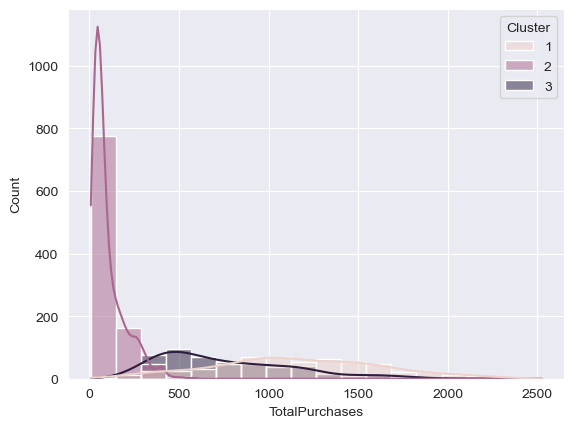

In [148]:
sns.histplot(data=kmean_df, x='TotalPurchases', hue=kmean_df['Cluster'], kde=True)

In [149]:
kmean_df.groupby('Cluster')['TotalPurchases'].mean()

Cluster
1               1,156.18
2                  99.99
3                 759.37
Name: TotalPurchases, dtype: float64

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packag

<Axes: xlabel='Age', ylabel='Count'>

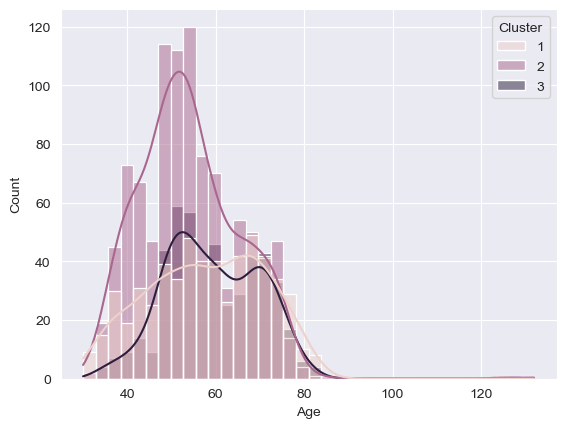

In [150]:
sns.histplot(data=kmean_df, x='Age', hue=kmean_df['Cluster'], kde=True)

In [151]:
kmean_df.groupby('Cluster')['Age'].mean()

Cluster
1                  57.72
2                  54.06
3                  59.22
Name: Age, dtype: float64

In [152]:
#seperating the clusters 
cluster_1 = kmean_df[kmean_df['Cluster'] == 1]
cluster_2 = kmean_df[kmean_df['Cluster'] == 2]
cluster_3 = kmean_df[kmean_df['Cluster'] == 3]

In [153]:
cluster_1.describe()


,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Income,Kidhome,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,TotalPurchases,Cluster
count,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00
mean,57.72,0.00,0.52,0.18,0.21,"71,605.98",0.04,0.00,0.10,0.36,0.22,0.29,0.03,0.00,82.62,58.24,67.16,363.67,57.10,527.39,5.22,1.48,8.55,4.98,2.76,50.27,0.19,0.34,"1,156.18",1.00
std,12.95,0.00,0.50,0.38,0.41,"10,600.95",0.20,0.00,0.30,0.48,0.41,0.45,0.18,0.00,58.35,44.41,51.95,222.62,43.16,291.84,2.43,1.03,2.82,2.09,1.40,29.31,0.39,0.49,468.56,0.00
min,30.00,0.00,0.00,0.00,0.00,"30,522.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,14.00,1.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,92.00,1.00
25%,47.50,0.00,0.00,0.00,0.00,"65,428.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.00,24.00,29.00,174.50,24.00,294.50,3.00,1.00,6.00,3.00,2.00,24.00,0.00,0.00,842.00,1.00
50%,58.00,0.00,1.00,0.00,0.00,"71,952.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,71.00,45.00,52.00,335.00,45.00,483.00,5.00,1.00,8.00,5.00,3.00,54.00,0.00,0.00,"1,130.00",1.00
75%,68.00,0.00,1.00,0.00,0.00,"79,437.50",0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,123.50,85.00,95.00,511.00,85.00,736.00,7.00,2.00,11.00,6.00,4.00,74.00,0.00,1.00,"1,482.50",1.00
max,84.00,0.00,1.00,1.00,1.00,"94,384.00",2.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,224.00,172.00,223.00,883.00,172.00,"1,285.00",11.00,7.00,13.00,11.00,8.00,99.00,1.00,2.00,"2,524.00",1.00


The average income in this cluster is 71k, much higher than the other 2 clusters. The standard deviation is 10.6k, so there is not much variation in the incomes in this cluster.
The average age of the customers is 57, which is higher than cluster 2 and lower than cluster 3. 
The plurality of the customers in this cluster are married, and households in this cluster tend to have older children in the house.
Additionally, most customers in this group have at least graduated university (0.52)
This cluster spends the most on premium products like wine and gold ( '$'527 and '$'67 respectively).
It is likely that customers in this cluster are older, potentially retired customers who have high amounts of disposable income.

In [154]:
cluster_2.describe()

,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Income,Kidhome,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,TotalPurchases,Cluster
count,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00
mean,54.06,0.04,0.49,0.16,0.20,"35,676.86",0.78,0.00,0.10,0.39,0.23,0.25,0.03,0.00,6.28,4.37,13.87,22.82,4.40,48.25,0.54,1.99,3.32,2.18,6.37,48.81,0.09,0.48,99.99,2.00
std,11.37,0.20,0.50,0.37,0.40,"11,741.47",0.50,0.04,0.29,0.49,0.42,0.44,0.16,0.00,8.20,6.41,13.80,22.76,5.86,65.79,0.68,1.11,1.14,1.32,1.58,29.11,0.28,0.53,90.90,0.00
min,30.00,0.00,0.00,0.00,0.00,"8,820.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,1.00,2.00,0.00,2.00,0.00,0.00,0.00,8.00,2.00
25%,46.00,0.00,0.00,0.00,0.00,"26,892.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,8.00,0.00,9.00,0.00,1.00,3.00,1.00,5.00,24.00,0.00,0.00,40.00,2.00
50%,53.00,0.00,0.00,0.00,0.00,"35,414.50",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,2.00,10.00,15.00,2.00,23.00,0.00,2.00,3.00,2.00,7.00,48.50,0.00,0.00,65.00,2.00
75%,61.00,0.00,1.00,0.00,0.00,"43,821.75",1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,8.00,6.00,20.00,28.00,6.00,56.00,1.00,3.00,4.00,3.00,8.00,76.00,0.00,1.00,132.75,2.00
max,132.00,1.00,1.00,1.00,1.00,"69,139.00",2.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,69.00,55.00,102.00,134.00,42.00,464.00,5.00,7.00,10.00,8.00,10.00,99.00,1.00,2.00,577.00,2.00


In cluster 2, the average income is much lower, (35k), which is the lowest of all the clusters. There is also less variation in the income (11k).
The average age of the customers in this cluster is 54, which is the lowest of all the clusters.
Most of the members in the cluster are married, although many in this cluster are also single.
The majority of customers in this cluster also tend to have younger children in the house, compared to cluster 1.
The customers in this cluster appear to be less educated than those in cluster 1, with a larger proportion having a high school education or less
This cluster also spends the least on premium items like wine (48.35 on average) and gold (4.40 on average).
From this, it is likely that customers in the cluster are either young single professionals, or couples with young families.


In [155]:
cluster_3.describe()

,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Income,Kidhome,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,TotalPurchases,Cluster
count,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00,488.00
mean,59.22,0.01,0.47,0.17,0.27,"55,978.23",0.35,0.00,0.14,0.40,0.16,0.25,0.04,0.00,28.85,20.65,61.92,140.51,22.56,484.90,3.08,4.25,7.44,6.67,6.65,49.39,0.18,0.84,759.37,3.00
std,10.43,0.08,0.50,0.38,0.45,"11,734.37",0.51,0.05,0.34,0.49,0.36,0.43,0.20,0.06,36.17,25.62,50.33,105.65,29.93,301.89,2.09,2.47,2.67,2.31,1.43,28.04,0.38,0.50,373.92,0.00
min,33.00,0.00,0.00,0.00,0.00,"8,028.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,7.00,0.00,1.00,0.00,0.00,3.00,0.00,0.00,0.00,178.00,3.00
25%,51.00,0.00,0.00,0.00,0.00,"48,779.75",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,3.00,24.00,69.00,3.00,244.75,2.00,2.00,5.00,5.00,6.00,27.00,0.00,1.00,457.25,3.00
50%,59.00,0.00,0.00,0.00,0.00,"56,460.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,12.00,43.50,112.00,12.00,435.00,2.00,4.00,7.00,7.00,7.00,51.00,0.00,1.00,670.00,3.00
75%,69.00,0.00,1.00,0.00,1.00,"63,841.00",1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,39.00,28.00,91.00,180.00,28.00,658.00,4.00,6.00,9.00,8.00,8.00,70.00,0.00,1.00,"1,001.00",3.00
max,82.00,1.00,1.00,1.00,1.00,"93,404.00",2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,223.00,159.00,219.00,653.00,157.00,"1,285.00",11.00,15.00,13.00,11.00,19.00,99.00,1.00,2.00,"2,092.00",3.00


Lastly, in cluster 3, the average income is around 57k, which is in between the averages for the other two clusters, and there is also a similar amount of variation to cluster 2.
Customers in this cluster tend to be the oldest, and have a higher proportion of divorced and widowed customer, although the majority are still married.
This is also the cluster with the highest average teenhome score across all the clusters. 
This cluster is also the most educated of all the clusters, with higher proportions of PhD and masters' degree holders.
Additionally, this cluster spends less on the most premium items sold, and the most on deals and online purchases.
It is likely that the customers in this cluster come from middle class families, with more established families.